# **Come On Down And Escape The Maze**
## [Riddler Express, Feb 15, 2019](https://fivethirtyeight.com/features/come-on-down-and-escape-the-maze/)

### solution by [Laurent Lessard](https://laurentlessard.com)

Here is what the maze looks like:

![maze](https://fivethirtyeight.com/wp-content/uploads/2019/02/reigle.png?w=400)

and here is my solution:

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

# Encode the grid using my own symbols
raw = '''\
|U20RRRX|3-1-00XU|3|,\
R-DURL2|X01|2U13|DR|,\
-|2|-3LD||LD-L||2|XR,\
|----L-R0|3|3|-1--L1,\
-U-DX|--1X|0L0R13LL-,\
1||-|1|--|3-D-L-|R--,\
|D|-|X|--1|2--||--R1,\
32---|-3R|3|3UU-||DU,\
R0UR12R|-|33|0LX--|D,\
|-DRL2|D-0|1-|UL-0||,\
|-2|1D|UU0S2-3||-U--,\
-DX-3L|||-|L2|-|-|U|,\
|XUL-||U||L-10-3LD-|,\
2XRD||||X1||-0|R03--,\
X|2RRD-1U|0-31L-X--|,\
LDD-1-||D--||10U|||0,\
-D3-|-2D-U-L0X2-1--|,\
X02--||D2002-UR---||,\
--1-||3|-3||20UU-2R-,\
L---3|||R-L-12-2-D|U\
'''

# convert my symbols to more intuitive ones
old_chars = ['U','D','|','-','L','R','S','X']
new_chars = ['↑','↓','↕','↔','←','→','☆','🕱']
for old,new in zip(old_chars,new_chars):
    raw = raw.replace(old,new)

# pad grid with skulls and format the grid into an array for easy access
G = np.array( [ list(s) for s in raw.split(sep=',') ] )

# pretty-print the grid!
Nx,Ny = G.shape
pd.DataFrame(G)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,↕,↑,2,0,→,→,→,🕱,↕,3,↔,1,↔,0,0,🕱,↑,↕,3,↕
1,→,↔,↓,↑,→,←,2,↕,🕱,0,1,↕,2,↑,1,3,↕,↓,→,↕
2,↔,↕,2,↕,↔,3,←,↓,↕,↕,←,↓,↔,←,↕,↕,2,↕,🕱,→
3,↕,↔,↔,↔,↔,←,↔,→,0,↕,3,↕,3,↕,↔,1,↔,↔,←,1
4,↔,↑,↔,↓,🕱,↕,↔,↔,1,🕱,↕,0,←,0,→,1,3,←,←,↔
5,1,↕,↕,↔,↕,1,↕,↔,↔,↕,3,↔,↓,↔,←,↔,↕,→,↔,↔
6,↕,↓,↕,↔,↕,🕱,↕,↔,↔,1,↕,2,↔,↔,↕,↕,↔,↔,→,1
7,3,2,↔,↔,↔,↕,↔,3,→,↕,3,↕,3,↑,↑,↔,↕,↕,↓,↑
8,→,0,↑,→,1,2,→,↕,↔,↕,3,3,↕,0,←,🕱,↔,↔,↕,↓
9,↕,↔,↓,→,←,2,↕,↓,↔,0,↕,1,↔,↕,↑,←,↔,0,↕,↕


In [188]:
# we'll call a STATE a tuple (x,y) corresponding to:
# x: the first coordinate (row number) on the grid
# y: the second coordinate (column number) on the grid

# return True if state is out-of-bounds (outside the allowed grid)
def out_of_bounds( state ):
    x,y = state
    if x < 0 or x >= Nx or y < 0 or y >= Ny:
        return True
    else:
        return False

# given that we are in a certain state, what is the corresponding letter on the grid?
def get_symbol( state ):
    return G[state[0],state[1]]

# how much cost is associated with the current state?
def cost( state ):
    s = get_symbol( state )
    if s in ['→','↑','←','↓','↔','↕','☆','🕱']:
        return 0
    else:
        return int(s)    

# given we are in a certain state, return the states we can move to
def next_states( state ):
    x,y = state
    right, up, left, down = (x,y+1), (x-1,y), (x,y-1), (x+1,y)
    mapping = {
        '→': [right],
        '↑': [up],
        '←': [left],
        '↓': [down],
        '↔': [right,left],
        '↕': [up,down],
        '🕱': []
    }
    # if it's not one of the symbols above, it must be a number (all moves allowed)
    return mapping.get(get_symbol(state), [right,up,left,down])

def print_soln(dist_dict, title=None, fname=None, solnspec=None):
    H = np.zeros((Nx,Ny))
    for (state,val) in dist_dict.items():
        H[state[0],state[1]] = val
        
    # unnecessarily complicated plotting routine...
    MAXD = 8 # maximum distance needed
    fig,ax = plt.subplots(figsize=(8,6))
    cmap = plt.cm.viridis
    bounds=np.arange(-0.5,MAXD+1.5,1)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    img = plt.imshow(H, vmin=0, vmax=MAXD, cmap=cmap, norm=norm, interpolation='none')
    plt.colorbar(img, ticks=np.arange(MAXD+1))
    plt.xticks(np.arange(0.5,Nx-0.5,step=1.0))
    plt.yticks(np.arange(0.5,Ny-0.5,step=1.0))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.grid()
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    plt.text(terminal_state[0],terminal_state[1],'★',
             horizontalalignment='center',verticalalignment='center',fontsize=18,color='white')
    if title != None:
        plt.title(title)
        
    # plot trajectory, specified by (start state, time)
    if solnspec != None:
        MAXT = 15  # max length of trajectory to plot (so we don't overwrite lines at the end)
        state,t = solnspec
        tfin = timesteps[-1]
        movelist = soln[tfin][state]
        xvals = [movelist[-i][1] for i in range(1,min(t+2,MAXT))]
        yvals = [movelist[-i][0] for i in range(1,min(t+2,MAXT))]
        plt.plot( xvals, yvals, 'r:.')
        
    if fname != None:
        plt.savefig(fname, dpi=200)
    
# list of all states and the terminal state
states = [ (i,j) for i in range(Nx) for j in range(Ny) ]
terminal_state = (10,10)

# initialize costs
def cost_mat():
    costs = dict()
    for state in states:
        costs[state] = np.inf
    costs[terminal_state] = 0
    return costs

# initialize solutions (all must end at terminal state)
def soln_mat():
    solns = dict()
    for state in states:
        solns[state] = [terminal_state]
    return solns

### Solution using Bellman-Ford algorithm

In [189]:
# number of time steps to simulate
# a hard upper bound is 400, the total number of states
timesteps = range(36)

# initialize list of distance dictionaries. dist[t] is a dict with (state,cost-to-go) items
dist = [ cost_mat() for t in timesteps ]

# intialize list of solution dictionaries. soln[t] is a dict with (state,list) of moves to perform from that state
soln = [ soln_mat() for t in timesteps ]

# all the magic happens right here: Bellman-Ford algorithm!
for t in timesteps[1:]:    
    for state in states:
        if state == terminal_state:
            continue

        possible_next_states = [next_state for next_state in next_states(state) if not out_of_bounds(next_state)]
        possible_costs = [cost(state) + dist[t-1][next_state] for next_state in possible_next_states]
        
        # pick a move that minimizes total cost
        dist[t][state] = min( possible_costs, default=np.inf )
        
        # if this was a legitimate move, add it to the move list
        if dist[t][state] != np.inf:
            ix = np.argmin( possible_costs )
            next_state = possible_next_states[ix]
            soln[t][state] = list(soln[t-1][next_state])
            soln[t][state].insert(0, state)
        
# visualize the optimal costs from all states in a numerical grid
sol = np.zeros((Nx,Ny),dtype=str)
for (state,val) in dist[-1].items():
    if val == np.inf:
        sol[state[0],state[1]] = '∞'
    else:
        sol[state[0],state[1]] = val
    
pd.DataFrame(sol)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,∞,∞,∞,∞,∞,∞,∞,∞,∞,7,4,4,3,3,3,∞,∞,3,6,∞
1,∞,∞,∞,∞,∞,∞,4,2,∞,5,5,4,5,3,3,6,5,3,∞,∞
2,∞,∞,∞,∞,∞,∞,∞,2,2,5,5,4,4,4,2,3,5,3,∞,∞
3,∞,∞,∞,∞,∞,∞,2,2,2,5,7,4,5,2,2,3,3,3,3,4
4,∞,∞,5,5,∞,3,2,2,2,∞,4,4,4,2,2,2,4,4,4,4
5,8,7,5,5,5,3,2,1,1,1,4,4,5,5,5,1,1,∞,∞,∞
6,8,7,5,5,5,∞,2,1,1,1,3,5,5,5,5,1,1,1,∞,∞
7,8,7,5,5,5,5,3,3,0,0,3,4,4,5,5,1,1,1,1,∞
8,5,5,5,6,6,5,3,3,0,0,3,4,1,1,1,∞,1,1,1,1
9,5,5,7,∞,∞,5,3,∞,0,0,0,1,1,1,1,1,1,1,1,1


/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


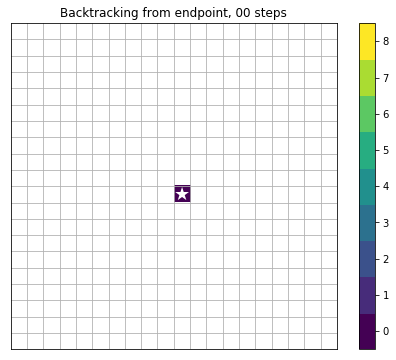

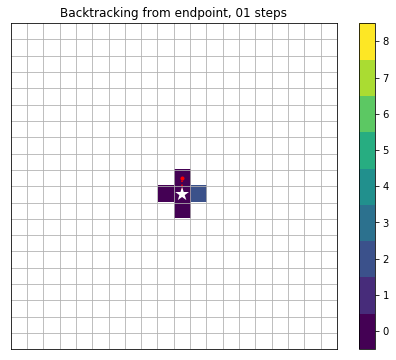

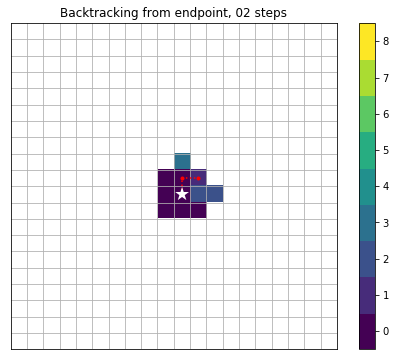

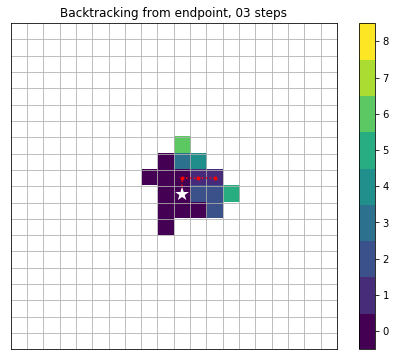

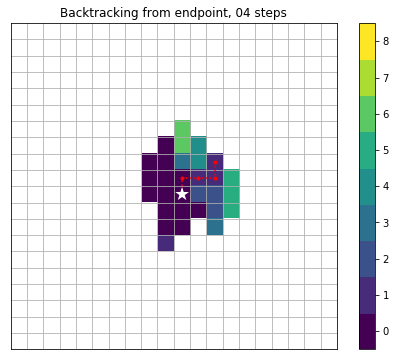

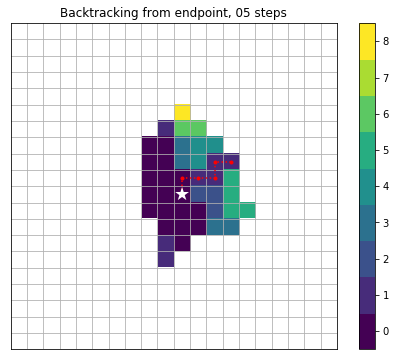

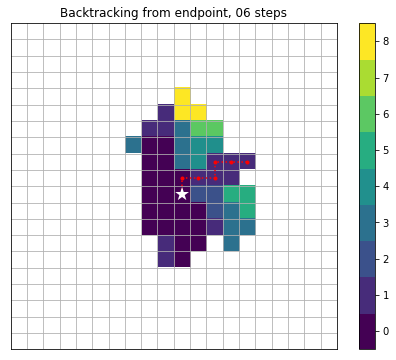

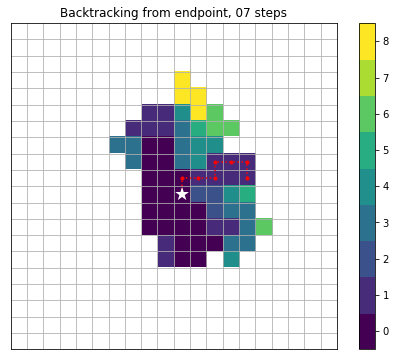

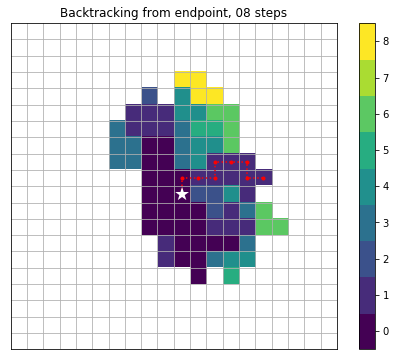

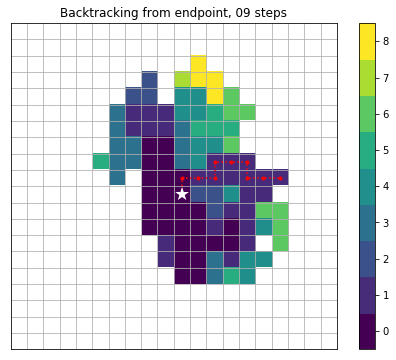

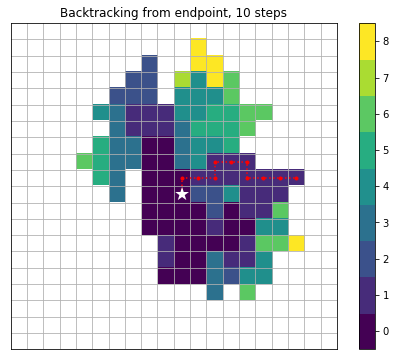

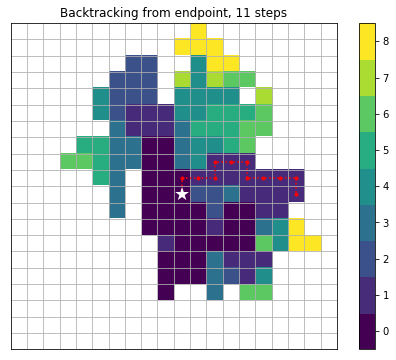

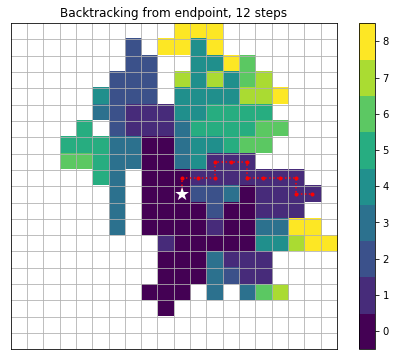

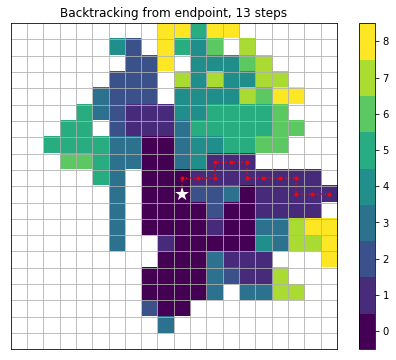

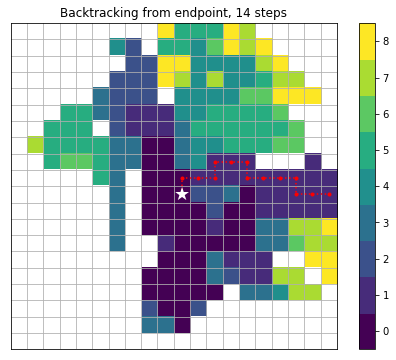

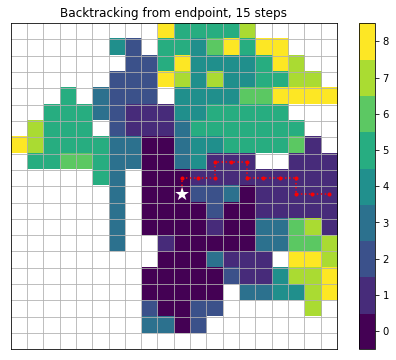

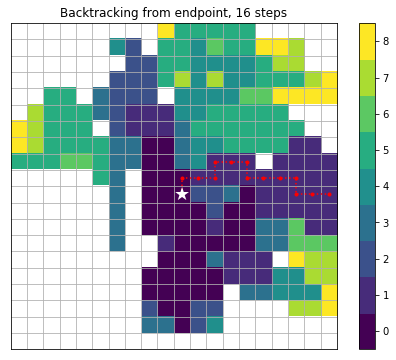

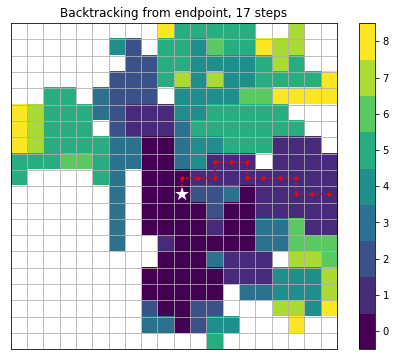

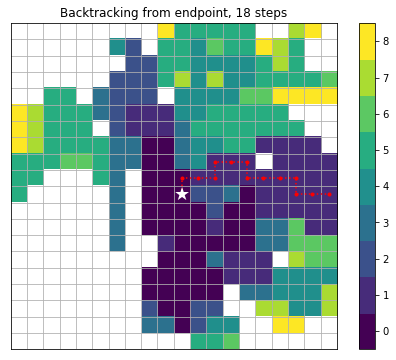

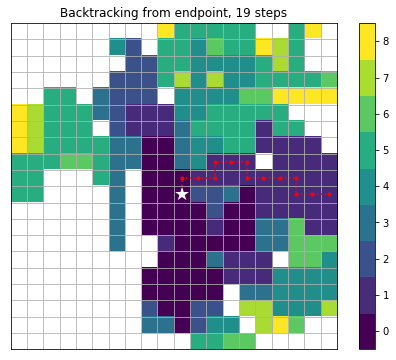

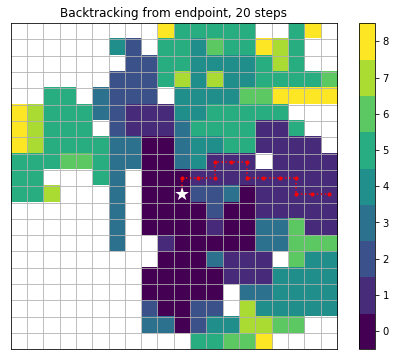

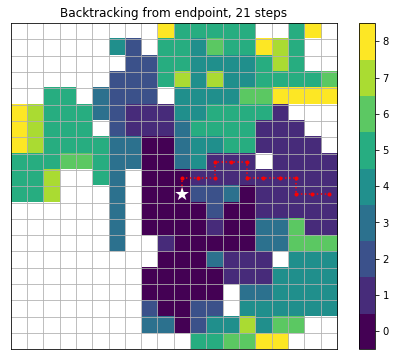

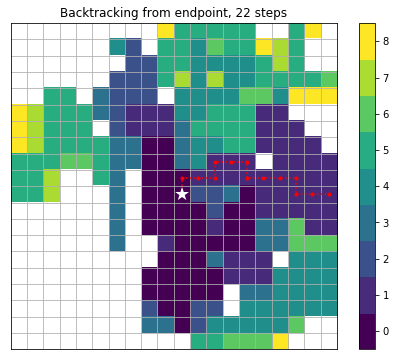

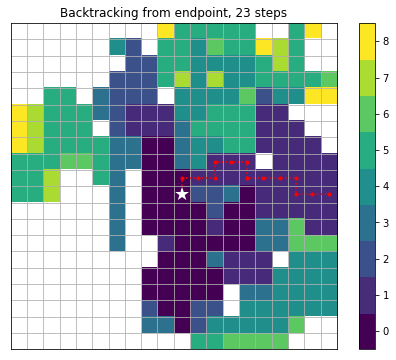

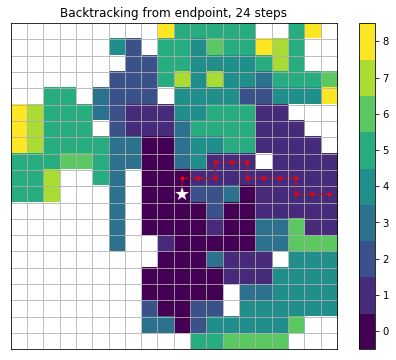

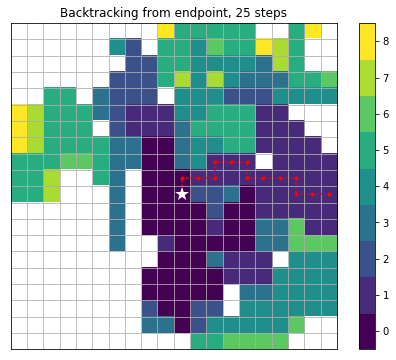

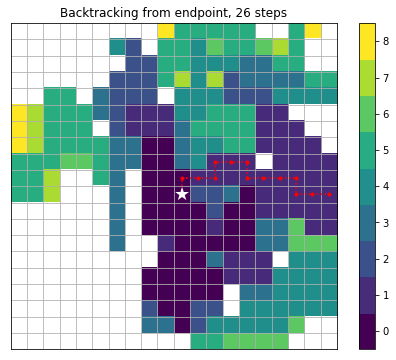

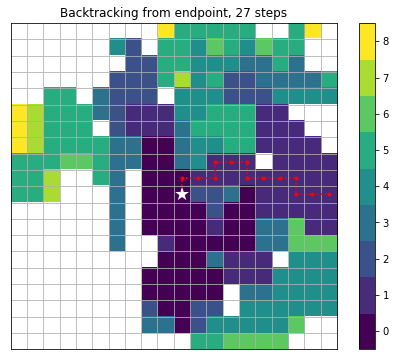

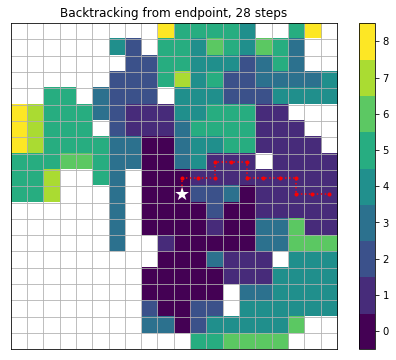

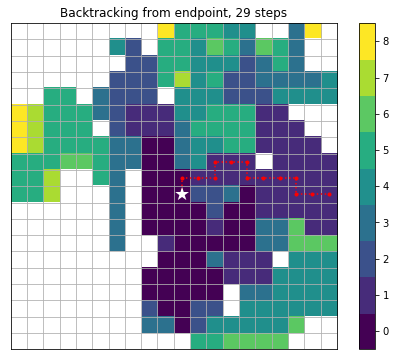

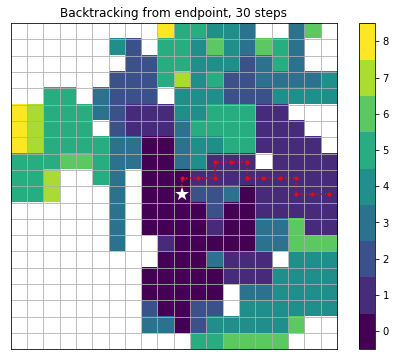

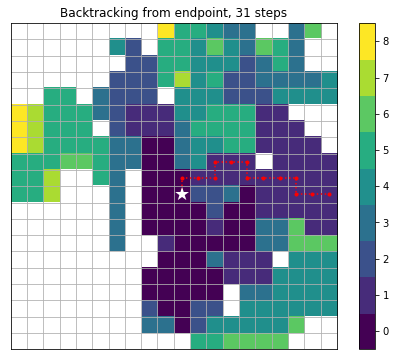

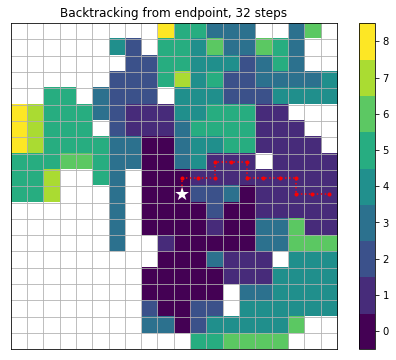

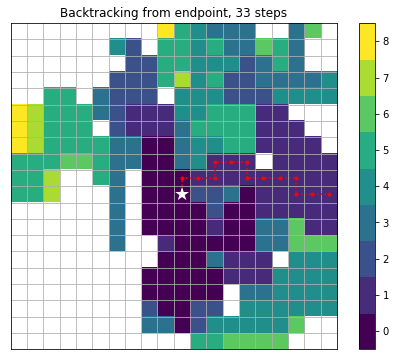

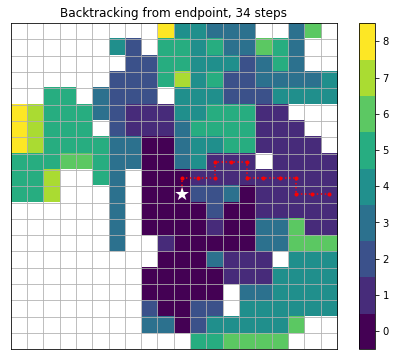

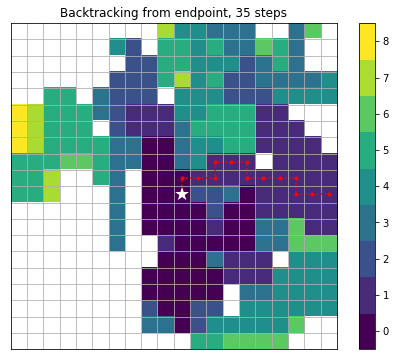

In [191]:
# display a particular solution and save to .png
for t in timesteps:
    tstr = str(t).zfill(2)
    print_soln(dist[t], solnspec=((10,19),t),
               title="Backtracking from endpoint, " + tstr + " steps",
               fname="gridplot_" + tstr + ".png")